# Movie Data: Predicting Average Rating

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
from config.settings import DB_PATH

## Importing data

In [2]:
with sqlite3.connect(DB_PATH) as conn:
    cursor = conn.cursor()
    query = """SELECT * FROM movie_rating_features;"""
    df = pd.read_sql_query(query, conn)

df.head()

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,genre_ids
0,2,7.113,Ariel,1988-10-21,73,None,0,None,None,2303,"18,35,80,10749"
1,3,7.300,Shadows in Paradise,1986-10-17,74,None,0,None,None,2303,"18,35,10749"
2,5,5.858,Four Rooms,1995-12-09,98,"3129,3130,3131,3124,2555",28,"138,2294,3110,3111","138,2294,3110,3111","14,59","35,80"
3,6,6.500,Judgment Night,1993-10-15,109,"2880,9777,5724,10822,12799",31,2042,"52035,52035,1088307","33,182,1644","28,53,80"
4,11,8.200,Star Wars,1977-05-25,121,"2,3,4,5,12248",104,1,1,"1,25","12,28,878"


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44208 entries, 0 to 44207
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          44208 non-null  int64  
 1   vote_average      44208 non-null  float64
 2   title             44208 non-null  object 
 3   release_date      44208 non-null  object 
 4   runtime           44208 non-null  int64  
 5   top_5_cast_ids    28457 non-null  object 
 6   num_cast_members  44208 non-null  int64  
 7   director_ids      28720 non-null  object 
 8   writer_ids        27373 non-null  object 
 9   company_ids       42211 non-null  object 
 10  genre_ids         44092 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.7+ MB


## Preprocessing

In [42]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26111 entries, 2 to 44206
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          26111 non-null  int64  
 1   vote_average      26111 non-null  float64
 2   title             26111 non-null  object 
 3   release_date      26111 non-null  object 
 4   runtime           26111 non-null  int64  
 5   top_5_cast_ids    26111 non-null  object 
 6   num_cast_members  26111 non-null  int64  
 7   director_ids      26111 non-null  object 
 8   writer_ids        26111 non-null  object 
 9   company_ids       26111 non-null  object 
 10  genre_ids         26111 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.4+ MB


In [43]:
df.head(50)

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,genre_ids
2,5,5.858,Four Rooms,1995-12-09,98,"3129,3130,3131,3124,2555",28,"138,2294,3110,3111","138,2294,3110,3111","14,59",35
3,6,6.500,Judgment Night,1993-10-15,109,"2880,9777,5724,10822,12799",31,2042,"52035,52035,1088307","33,182,1644","28,53,80"
4,11,8.200,Star Wars,1977-05-25,121,"2,3,4,5,12248",104,1,1,"1,25","12,28,878"
5,12,7.817,Finding Nemo,2003-05-30,100,"13,14,12,5293,118",68,"7,8","7,7,10,11,32535,1236458,1994647,2004922,2216342",3,"16,10751"
6,13,8.468,Forrest Gump,1994-06-23,142,"31,32,33,35,34",176,24,"26,27","4,412,21920","18,35,10749"
7,14,8.009,American Beauty,1999-09-15,122,"1979,516,2155,8210,8211",41,39,2152,"7,2721",18
8,15,8.000,Citizen Kane,1941-04-17,119,"40,7664,11029,14518,11028",154,40,"40,30012","6,11447","18,9648"
9,16,7.900,Dancer in the Dark,2000-09-01,140,"47,50,52,53,6748",69,42,"42,42,106200","46,76,94,119,157,201,591,2801,7330,11239,14937...","18,80"
10,17,5.700,The Dark,2005-09-28,87,"49,48,55,51,54",11,43,"44,45,2315165","47,248,2268,2452","27,53,9648"
11,18,7.600,The Fifth Element,1997-05-02,126,"62,63,64,65,66",120,59,"59,59,61",9,"12,28,878"


In [44]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26111 entries, 2 to 44206
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   movie_id          26111 non-null  int64         
 1   vote_average      26111 non-null  float64       
 2   title             26111 non-null  object        
 3   release_date      26111 non-null  datetime64[ns]
 4   runtime           26111 non-null  int64         
 5   top_5_cast_ids    26111 non-null  object        
 6   num_cast_members  26111 non-null  int64         
 7   director_ids      26111 non-null  object        
 8   writer_ids        26111 non-null  object        
 9   company_ids       26111 non-null  object        
 10  genre_ids         26111 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 2.4+ MB


In [46]:
df.columns

Index(['movie_id', 'vote_average', 'title', 'release_date', 'runtime',
       'top_5_cast_ids', 'num_cast_members', 'director_ids', 'writer_ids',
       'company_ids', 'genre_ids'],
      dtype='object')

### Checking the distribution of vote averages isn't skewed

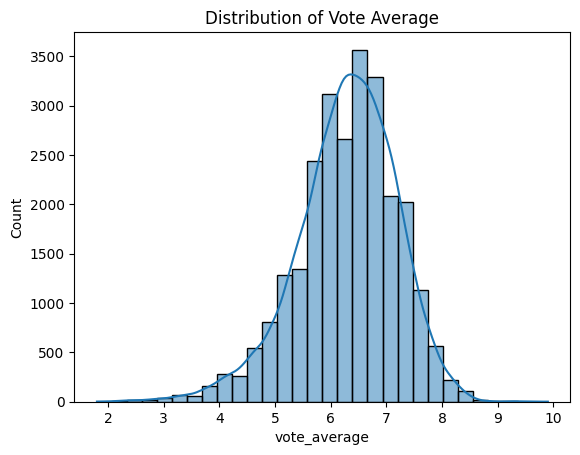

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["vote_average"], bins=30, kde=True)
plt.title("Distribution of Vote Average")
plt.show()

### Checking correlation on raw data

In [48]:
df.corr(numeric_only=True)["vote_average"].sort_values(ascending=False)

vote_average        1.000000
runtime             0.188236
num_cast_members    0.142284
movie_id            0.075643
Name: vote_average, dtype: float64

In [49]:
df.columns

Index(['movie_id', 'vote_average', 'title', 'release_date', 'runtime',
       'top_5_cast_ids', 'num_cast_members', 'director_ids', 'writer_ids',
       'company_ids', 'genre_ids'],
      dtype='object')

### Splitting data to test and train before further preprocessing to avoid leakage

In [50]:
from sklearn.model_selection import train_test_split

# Split the dataset first
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.columns

Index(['movie_id', 'vote_average', 'title', 'release_date', 'runtime',
       'top_5_cast_ids', 'num_cast_members', 'director_ids', 'writer_ids',
       'company_ids', 'genre_ids'],
      dtype='object')

### Using frequency encoding on most categorical features

In [51]:
categorical_cols = ['company_ids', 'top_5_cast_ids', 'director_ids', 'writer_ids']

for col in categorical_cols:
    # Compute frequencies in training data
    freq_map = train_df[col].value_counts().to_dict()
    
    # Map frequencies in both training and test sets
    train_df[col + '_freq'] = train_df[col].map(freq_map)
    test_df[col + '_freq'] = test_df[col].map(freq_map)

    # Fill missing values with a default frequency (e.g., 1)
    train_df[col + '_freq'] = train_df[col + '_freq'].fillna(1)
    test_df[col + '_freq'] = test_df[col + '_freq'].fillna(1)

train_df.corr(numeric_only=True)["vote_average"].sort_values(ascending=False)

vote_average           1.000000
runtime                0.188133
num_cast_members       0.140169
director_ids_freq      0.108966
movie_id               0.076759
top_5_cast_ids_freq    0.052982
writer_ids_freq        0.045948
company_ids_freq       0.018528
Name: vote_average, dtype: float64

In [52]:
train_df.corr(numeric_only=True)["vote_average"].sort_values(ascending=False)

vote_average           1.000000
runtime                0.188133
num_cast_members       0.140169
director_ids_freq      0.108966
movie_id               0.076759
top_5_cast_ids_freq    0.052982
writer_ids_freq        0.045948
company_ids_freq       0.018528
Name: vote_average, dtype: float64

In [53]:
train_df.head()

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,genre_ids,company_ids_freq,top_5_cast_ids_freq,director_ids_freq,writer_ids_freq
26418,184098,6.400,Think Like a Man Too,2014-06-20,105,"11702,8177,98953,22122,35705",129,20400,"82587,147711,147712",49968,"35,10749",1,1,12,2
9600,22843,7.800,Evangelion: 2.0 You Can (Not) Advance,2009-06-26,112,"77927,40325,83768,9711,77931",17,"77921,77923,77926","77921,77921",4145,"16,18,28,878",3,1,2,3
30162,332340,6.589,Man Up,2015-05-29,88,"11108,25703,139549,25136,17477",23,1218992,1444799,"288,443,20664,113521","35,10749",1,1,3,1
14734,39770,5.800,Brief Crossing,2001-03-06,84,"180970,588252,1344779,1093326,1344780",6,6295,6295,"94,587,1028,18540","18,10749",1,1,6,2
15987,43228,4.600,I Was a Teenage Werewolf,1957-06-19,76,"116771,137909,13786,1042711,108289",18,51767,"31252,31252,31253,31253","4697,9266","14,18,27,878",1,1,1,2


### One-hot encoding for genres

In [54]:
train_df["genre_ids"].head()

26418        35,10749
9600     16,18,28,878
30162        35,10749
14734        18,10749
15987    14,18,27,878
Name: genre_ids, dtype: object

In [55]:
import pandas as pd

def one_hot_encode_genres(df):
    """One-hot encodes the genre_ids column."""
    # Convert genre_ids to lists
    df["genre_ids"] = df["genre_ids"].apply(lambda x: x.split(','))
    
    # Extract unique genre IDs
    all_genres = sorted(set(genre for genres in df["genre_ids"] for genre in genres))

    # Create one-hot encoded columns
    for genre in all_genres:
        df[f"genre_{genre}"] = df["genre_ids"].apply(lambda x: int(genre in x))

    # Drop original genre_ids column
    df.drop(columns=["genre_ids"], inplace=True)
    return df

# Apply to both train and test sets
train_df = one_hot_encode_genres(train_df)
test_df = one_hot_encode_genres(test_df)

print(train_df.columns)
print(test_df.columns)

Index(['movie_id', 'vote_average', 'title', 'release_date', 'runtime',
       'top_5_cast_ids', 'num_cast_members', 'director_ids', 'writer_ids',
       'company_ids', 'company_ids_freq', 'top_5_cast_ids_freq',
       'director_ids_freq', 'writer_ids_freq', 'genre_10402', 'genre_10749',
       'genre_10751', 'genre_10752', 'genre_10770', 'genre_12', 'genre_14',
       'genre_16', 'genre_18', 'genre_27', 'genre_28', 'genre_35', 'genre_36',
       'genre_37', 'genre_53', 'genre_80', 'genre_878', 'genre_9648',
       'genre_99'],
      dtype='object')
Index(['movie_id', 'vote_average', 'title', 'release_date', 'runtime',
       'top_5_cast_ids', 'num_cast_members', 'director_ids', 'writer_ids',
       'company_ids', 'company_ids_freq', 'top_5_cast_ids_freq',
       'director_ids_freq', 'writer_ids_freq', 'genre_10402', 'genre_10749',
       'genre_10751', 'genre_10752', 'genre_10770', 'genre_12', 'genre_14',
       'genre_16', 'genre_18', 'genre_27', 'genre_28', 'genre_35', 'genre_36',
  

### Convert release dates to ints

In [56]:
# Find the earliest release date in the training set
min_date = train_df['release_date'].min()

# Convert 'release_date' to the number of days since the earliest date
train_df['release_date_days'] = (train_df['release_date'] - min_date).dt.days
test_df['release_date_days'] = (test_df['release_date'] - min_date).dt.days

# Drop the original 'release_date' column
train_df = train_df.drop(columns=['release_date'])
test_df = test_df.drop(columns=['release_date'])

train_df.head()

,movie_id,vote_average,title,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,company_ids_freq,...,genre_28,genre_35,genre_36,genre_37,genre_53,genre_80,genre_878,genre_9648,genre_99,release_date_days
26418,184098,6.400,Think Like a Man Too,105,"11702,8177,98953,22122,35705",129,20400,"82587,147711,147712",49968,1,...,0,1,0,0,0,0,0,0,0,41320
9600,22843,7.800,Evangelion: 2.0 You Can (Not) Advance,112,"77927,40325,83768,9711,77931",17,"77921,77923,77926","77921,77921",4145,3,...,1,0,0,0,0,0,1,0,0,39500
30162,332340,6.589,Man Up,88,"11108,25703,139549,25136,17477",23,1218992,1444799,"288,443,20664,113521",1,...,0,1,0,0,0,0,0,0,0,41663
14734,39770,5.800,Brief Crossing,84,"180970,588252,1344779,1093326,1344780",6,6295,6295,"94,587,1028,18540",1,...,0,0,0,0,0,0,0,0,0,36466
15987,43228,4.600,I Was a Teenage Werewolf,76,"116771,137909,13786,1042711,108289",18,51767,"31252,31252,31253,31253","4697,9266",1,...,0,0,0,0,0,0,1,0,0,20500


## Modelling 

### A Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Drop non-numeric columns from the train and test dataframes
df_train_numeric = train_df.select_dtypes(include=['number'])
df_test_numeric = test_df.select_dtypes(include=['number'])

# Define features (everything except 'vote_average')
X_train = df_train_numeric.drop(columns=['vote_average'])
X_test = df_test_numeric.drop(columns=['vote_average'])

# Define target
y_train = train_df['vote_average']
y_test = test_df['vote_average']

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, view the model coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=["Coefficient"])
print(coefficients)


Mean Squared Error: 0.5890811938670871
R-squared: 0.2708993577125912
                      Coefficient
movie_id             5.664184e-07
runtime              6.417644e-03
num_cast_members     4.197573e-03
company_ids_freq    -1.163847e-03
top_5_cast_ids_freq  3.871856e-02
director_ids_freq    1.790142e-02
writer_ids_freq      8.540162e-03
genre_10402          8.978915e-02
genre_10749          4.118227e-02
genre_10751          4.037711e-02
genre_10752          1.025018e-01
genre_10770          6.519668e-02
genre_12            -2.372108e-02
genre_14             8.316921e-02
genre_16             8.717371e-01
genre_18             2.828375e-01
genre_27            -4.741328e-01
genre_28            -7.526201e-02
genre_35            -1.190135e-01
genre_36             6.774931e-02
genre_37             1.750980e-04
genre_53            -9.313158e-02
genre_80             5.256028e-02
genre_878           -1.613862e-01
genre_9648           1.396458e-01
genre_99             8.419291e-01
release_date_

### Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features to keep (numeric columns)
features_to_keep = train_df.select_dtypes(include=["float64", "int64"]).columns

# Prepare the training and test data
X_train = train_df[features_to_keep].drop(columns=["vote_average"])  # Dropping target variable
y_train = train_df["vote_average"]
X_test = test_df[features_to_keep].drop(columns=["vote_average"])  # Dropping target variable
y_test = test_df["vote_average"]

# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5066554253929926
R-squared: 0.37291701056106263


### Hyperparameter tuning

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_dist = {
    "n_estimators": [50, 100, 200, 500, 700],  # More trees may improve accuracy
    "max_depth": [None, 10, 20, 30, 40],  # Limit depth to prevent overfitting
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "max_features": ["sqrt", "log2", None]  
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=3, scoring="r2", verbose=1, n_jobs=4
)


# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best R² Score: 0.3738362883905868


In [60]:
best_rf = RandomForestRegressor(**random_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on test set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.4870507771199814
R-squared: 0.3971815122910164


In [61]:
best_rf.score(X_train, y_train)

0.6721124245031653

In [62]:
best_rf.score(X_test, y_test)

0.3971815122910164

### Gradient Boosted Regression Tree

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gbrt.fit(X_train, y_train)

# Score it:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.37333916125541844
0.3618263441156724


## Ensemble

In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV  # Meta-model

# Define the base models
rf = RandomForestRegressor(n_estimators=200, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Define the meta-model (can be simple, like Ridge Regression)
meta_model = RidgeCV()

# Create the stacking ensemble
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb)],  # Base models
    final_estimator=meta_model,           # Meta-model
    cv=5  # Cross-validation for training base models
)

# Train the ensemble
stacking_model.fit(X_train, y_train)

# Predict on test set
y_pred = stacking_model.predict(X_test)

# Evaluate performance
print("Train score:", stacking_model.score(X_train, y_train))
print(" Test score:", stacking_model.score(X_test, y_test))

Train score: 0.6918537782948753
 Test score: 0.39558605774096445


In [65]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="neg_mean_squared_error",
    random_state=42
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

print(f"Best Random Forest Parameters: {rf_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [66]:
gb_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 1.0]
}

gb_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="neg_mean_squared_error",
    random_state=42
)

gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_

print(f"Best Gradient Boosting Parameters: {gb_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Gradient Boosting Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}


In [67]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# Meta-model
meta_model = RidgeCV()

# Stacking ensemble with tuned models
stacking_model = StackingRegressor(
    estimators=[('rf', best_rf), ('gb', best_gb)],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

# Evaluate performance
print("Train score:", stacking_model.score(X_train, y_train))
print(" Test score:", stacking_model.score(X_test, y_test))

Train score: 0.6069992292312264
 Test score: 0.40660698557809216
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   8.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.8; total time=  17.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   8.5s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=0.8; total time=  35.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, m